### Sin agua

Number of images detected: 9


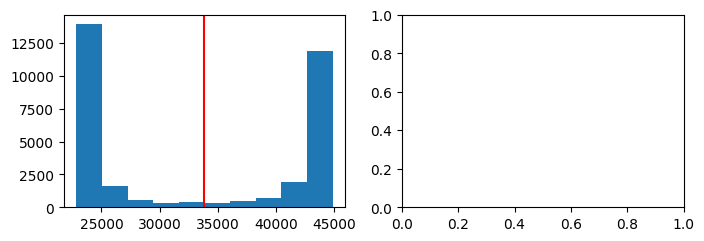

Promedio: [23868]


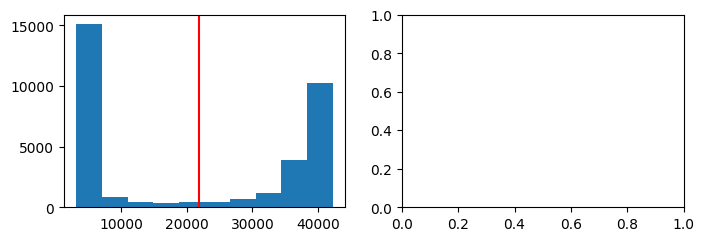

Promedio: [23868, 4340]


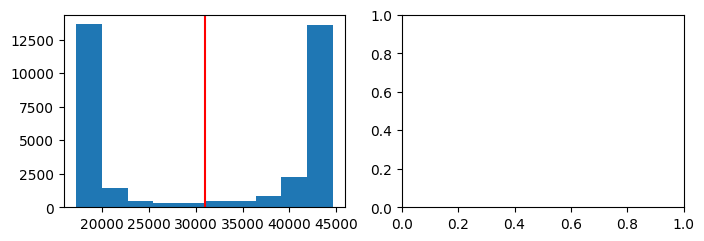

Promedio: [23868, 4340, 18495]


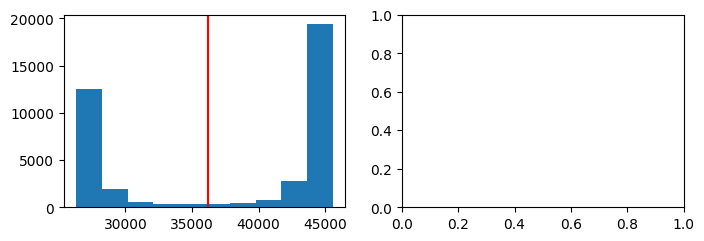

Promedio: [23868, 4340, 18495, 27332]


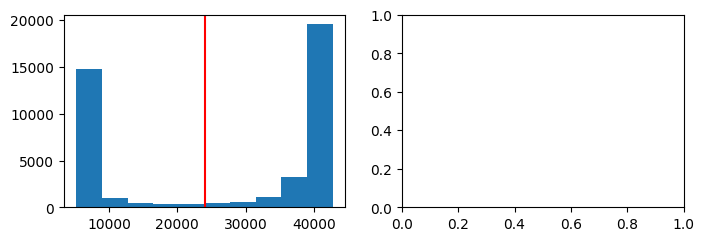

Promedio: [23868, 4340, 18495, 27332, 6154]


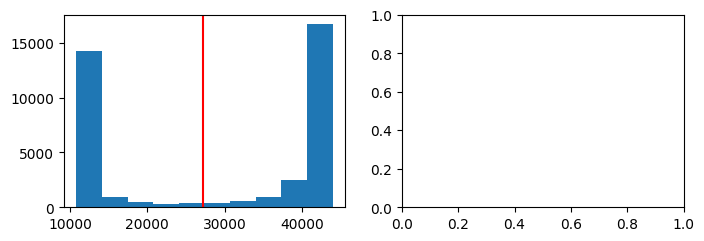

Promedio: [23868, 4340, 18495, 27332, 6154, 11577]


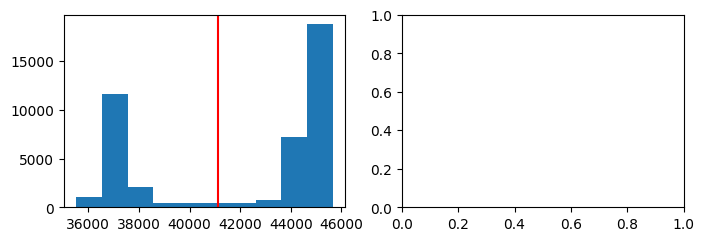

Promedio: [23868, 4340, 18495, 27332, 6154, 11577, 36732]


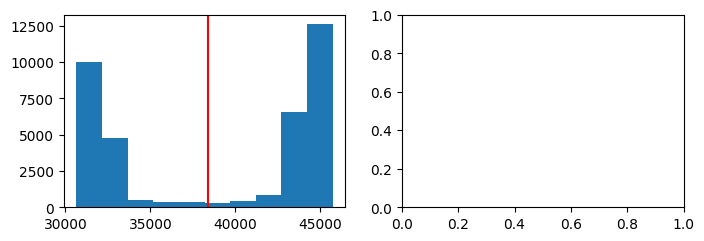

Promedio: [23868, 4340, 18495, 27332, 6154, 11577, 36732, 31728]


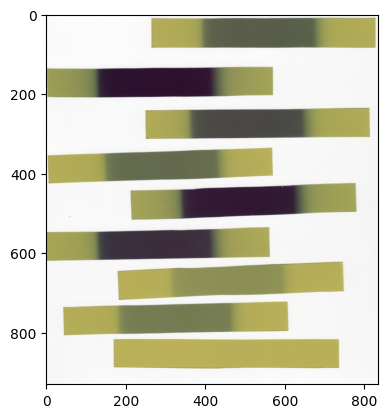

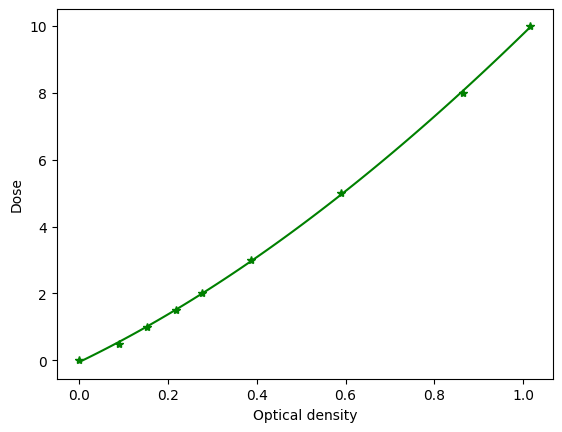

(930, 836, 3)

In [1]:
#from Dosepy.tools.image import load
from image import load
from pathlib import Path

imparted_doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10]

#file_path_sin = Path("/home/luis/Documents/GitHub/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"  # Office PC
file_path_sin = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif" # Personal laptop
cal_image_sin = load(file_path_sin, for_calib = True)
cal_sin = cal_image_sin.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True)
cal_image_sin.plot()
cal_sin.plot(color = 'green')

cal_image_sin.array.shape

### Con agua

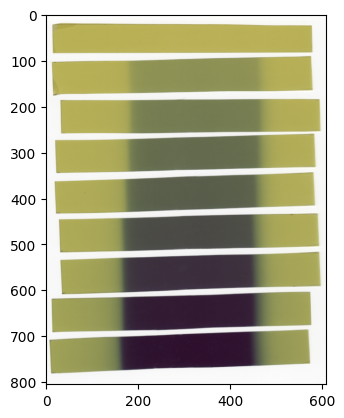

Number of images detected: 9


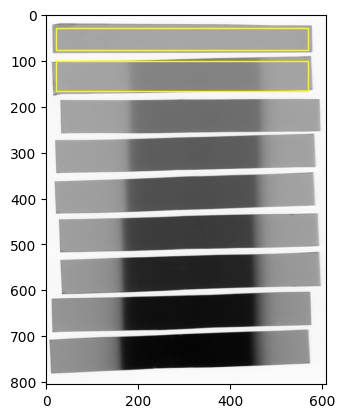

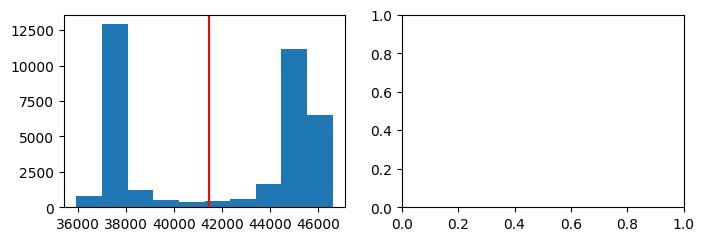

Promedio: [45358, 37100]


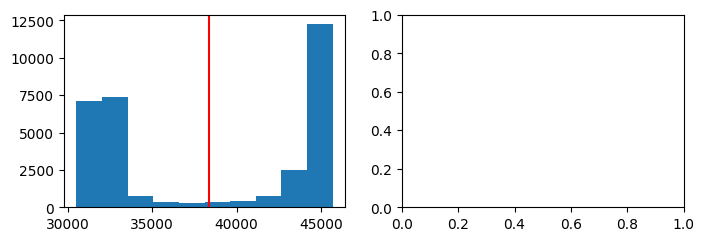

Promedio: [45358, 37100, 31474]


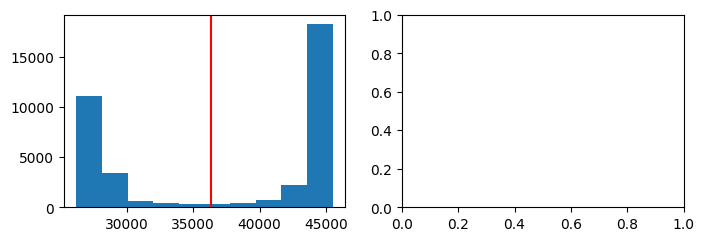

Promedio: [45358, 37100, 31474, 27507]


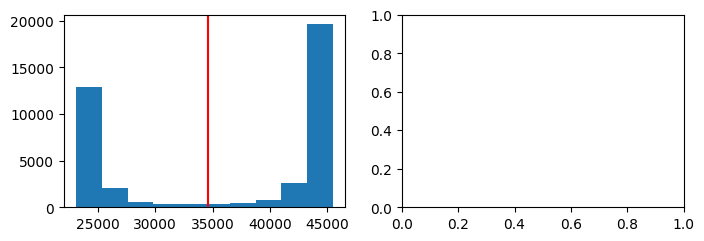

Promedio: [45358, 37100, 31474, 27507, 24015]


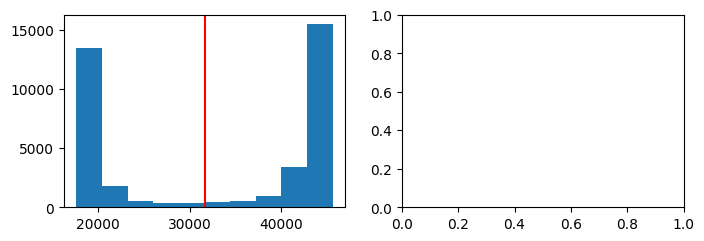

Promedio: [45358, 37100, 31474, 27507, 24015, 19019]


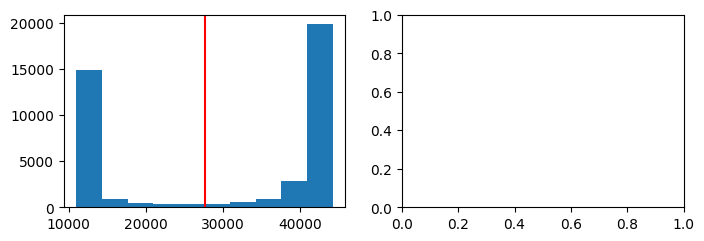

Promedio: [45358, 37100, 31474, 27507, 24015, 19019, 11947]


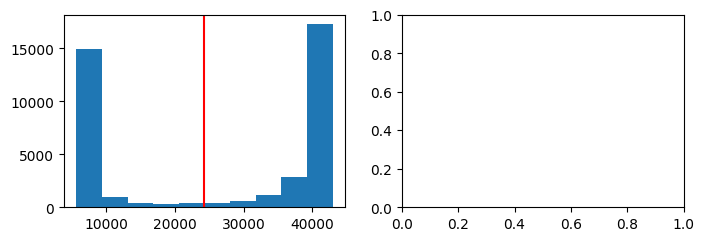

Promedio: [45358, 37100, 31474, 27507, 24015, 19019, 11947, 6719]


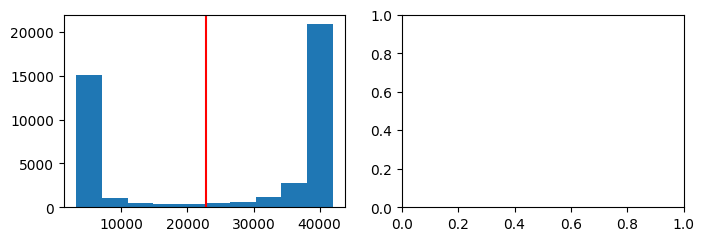

Promedio: [45358, 37100, 31474, 27507, 24015, 19019, 11947, 6719, 4266]
Number of images detected: 9


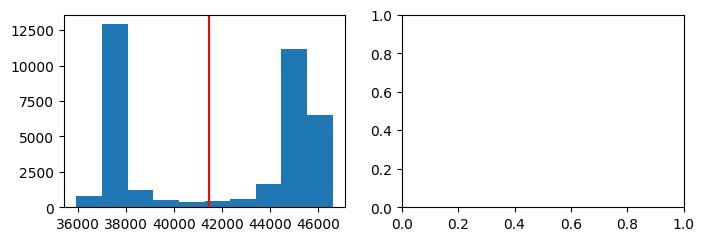

Promedio: [45358, 37100]


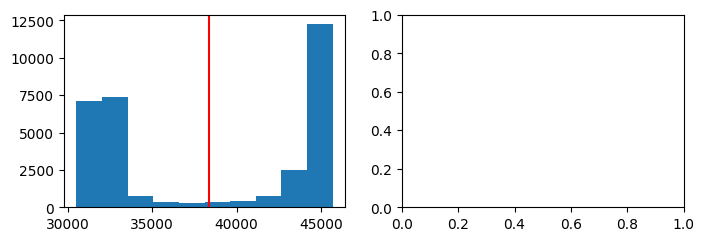

Promedio: [45358, 37100, 31474]


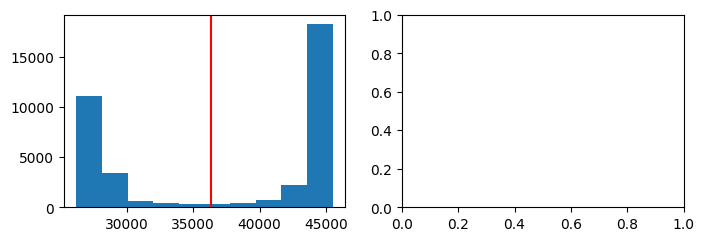

Promedio: [45358, 37100, 31474, 27507]


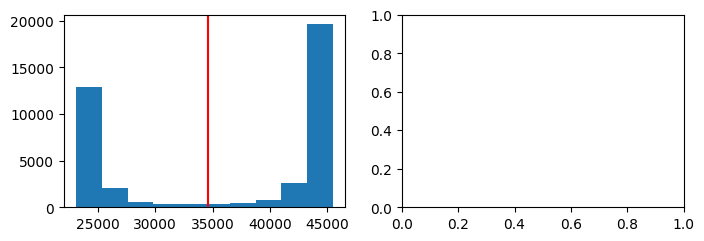

Promedio: [45358, 37100, 31474, 27507, 24015]


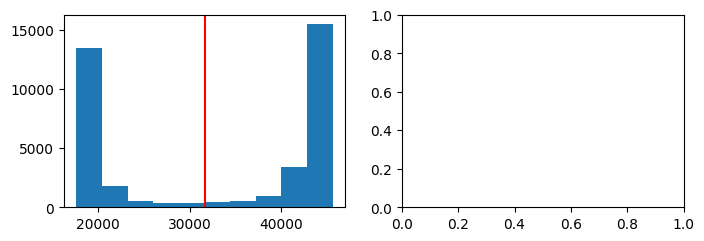

Promedio: [45358, 37100, 31474, 27507, 24015, 19019]


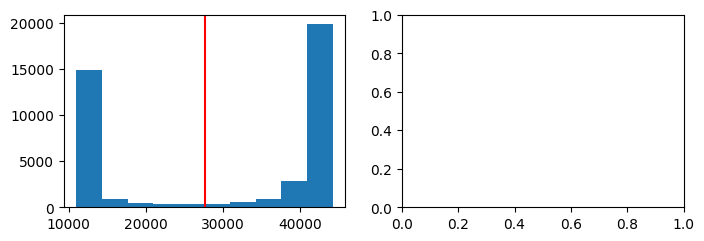

Promedio: [45358, 37100, 31474, 27507, 24015, 19019, 11947]


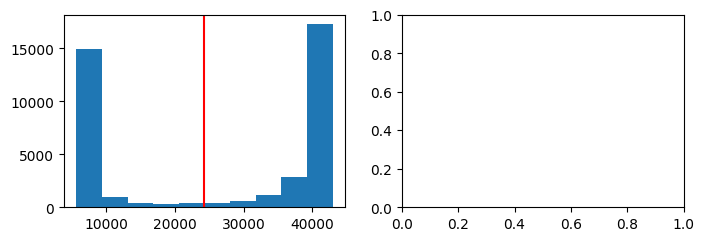

Promedio: [45358, 37100, 31474, 27507, 24015, 19019, 11947, 6719]


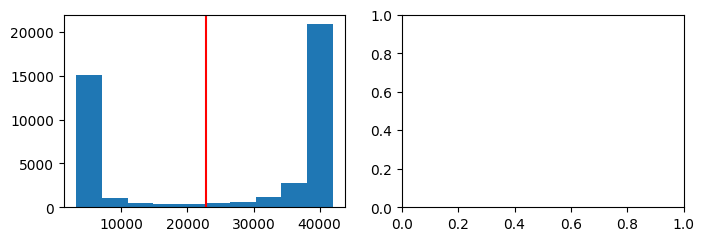

Promedio: [45358, 37100, 31474, 27507, 24015, 19019, 11947, 6719, 4266]


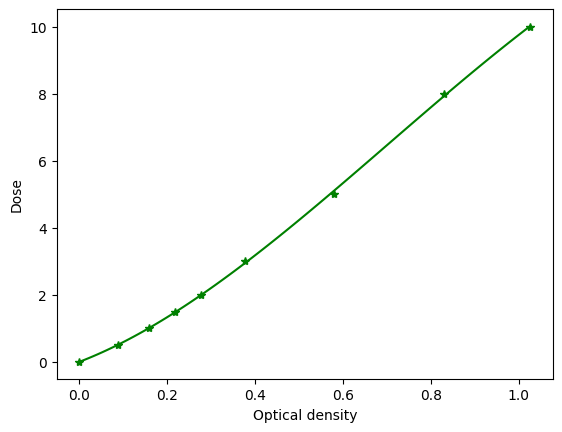

<Axes: xlabel='Optical density', ylabel='Dose'>

In [2]:
file_path_agua = Path("/home/luis/Descargas") / "agua.tif"
#file_path_agua = Path("/home/luis/Downloads") / "agua.tif"
cal_image_agua = load(file_path_agua, for_calib = True)
cal_image_agua.plot()
cal_image_agua.get_stat(ch = 'G', field_in_film = True, ar = 0.4, show = True, threshold = 0.8)
cal_agua = cal_image_agua.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True, threshold = 0.8)
cal_agua.plot(color = 'green')

## Dosis inferir (FAIL It is needed a reference film in the tif image)

In [ ]:
#inferir_path = Path("/home/luis/Descargas") / "dosis inferir.tif"
inferir_path = Path("/home/luis/Downloads") / "dosis inferir.tif"
inf_pre_path = Path("/home/luis/Downloads") / "pre.tif"
inferir_img = load(inferir_path)
inf_pre_img = load(inf_pre_path)

inferir_img.plot()
inf_pre_img.plot()
#dose_sin = inferir_img.to_dose(cal_sin)
#dose_agua = inferir_img.to_dose(cal_agua)

### Load the images using OMG_Dosimetry

We need to stack the "dosis inferir.tiff" with "pre,tif".

In [ ]:
from omg_dosimetry.imageRGB import stack_images, equate_images, load
#from pylinac.core.image import equate_image

inf_pre_img = load(Path("/home/luis/Downloads") / "pre.tif")

plt.hist(pre_img.array[:,:,1].ravel())

inferir_img = load(Path("/home/luis/Downloads") / "dosis inferir.tif")


In [ ]:
pre_img, post_img = equate_images(inferir_img, inf_pre_img)

#inf_img_v2 = stack_images([inferir_img.array, inf_pre_img.array])

In [ ]:
inf_img_v2 = stack_images([pre_img, post_img])
inf_img_v2.array = np.array(inf_img_v2.array*2**16, dtype = 'uint16')

plt.hist(inf_img_v2.array[:,:,1].ravel())

inf_img_v2.plot()

In [ ]:
import tifffile as tif

tif.imwrite('temp.tif', inf_img_v2.array, resolution=(75, 75), dtype = 'uint16')

## Use of combined image made by OMG_Dosimetry and tifffile

In [ ]:
from image import load
#test_img = load(Path("/home/luis/Downloads") / "Combined Stacks.tif")
test_img = load(Path("/home/luis/Downloads") / "temp.tif")
test_img.plot()

In [ ]:
test_img.get_stat(ch = 'G', field_in_film = True, ar = 0.4, show = True, threshold = 0.8)

In [ ]:
dose_img_sin = test_img.to_dose(cal_sin)
dose_img_con = test_img.to_dose(cal_agua)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img_sin)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

In [ ]:
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img_con)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

In [ ]:
plt.hist(test_img.array[:,:,1].ravel())

In [ ]:
import numpy as np
from calibration import polynomial_g3

print(test_img.array.shape)

mean_pixel, _ = test_img.get_stat(ch = "G", field_in_film = True, ar = 0.4, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)
#mean_pixel

optical_density = -np.log10(np.array(mean_pixel)/mean_pixel[0])

dosis_from_fit_sin = polynomial_g3(optical_density, *cal_sin.popt)
dosis_from_fit_sin[dosis_from_fit_sin < 0] = 0 # Remove doses < 0

dosis_from_fit_con = polynomial_g3(optical_density, *cal_agua.popt)
dosis_from_fit_con[dosis_from_fit_con < 0] = 0 # Remove doses < 0

print(dosis_from_fit_sin)
print(dosis_from_fit_con)

## Threshold fail

Not enough whie pixels?

In [ ]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

grayscale = rgb2gray(cal_image_agua.array)
plt.hist(grayscale.ravel())

thresh = threshold_otsu(grayscale)

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(grayscale.ravel(), bins = 20)
ax[0].axvline(thresh, color='r')

## Segundo set de imagenes para prueba "Dosis a inferir" (07-DIC-2023)

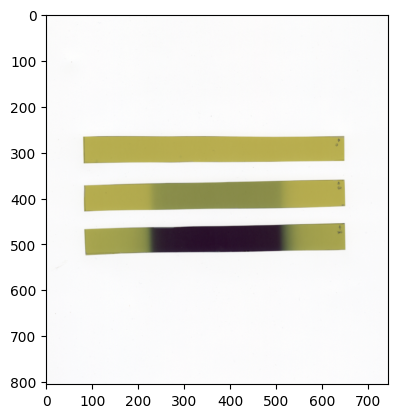

<Axes: >

In [3]:
inferir_path = Path("/home/luis/Descargas") / "img20231208_17322416.tif"
inferir_img = load(inferir_path)

inferir_img.plot()

Number of images detected: 3


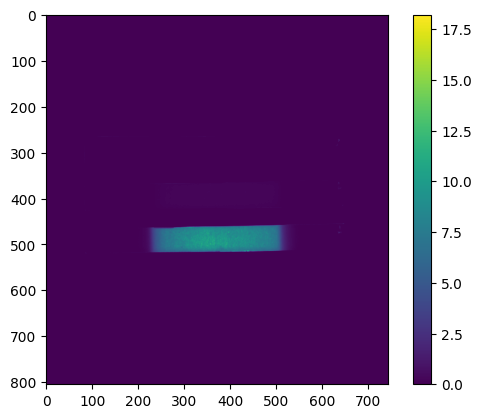

In [4]:
dose_img_sin = inferir_img.to_dose(cal_sin)
#dose_img_con = inferir_img.to_dose(cal_agua)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img_sin)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

Number of images detected: 3


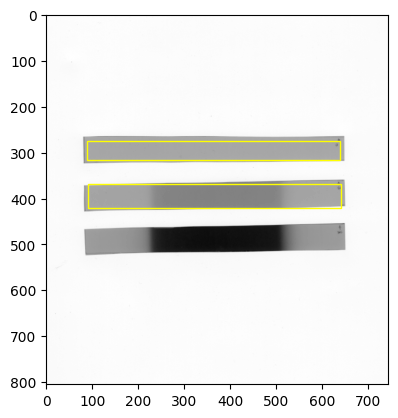

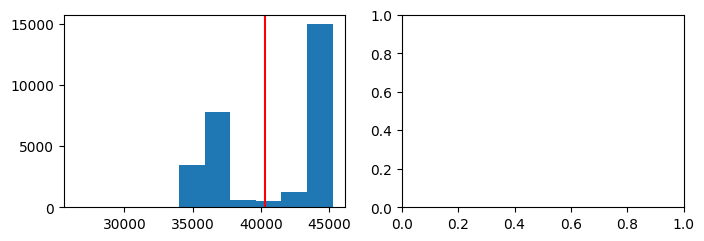

Promedio: [44540, 35787]


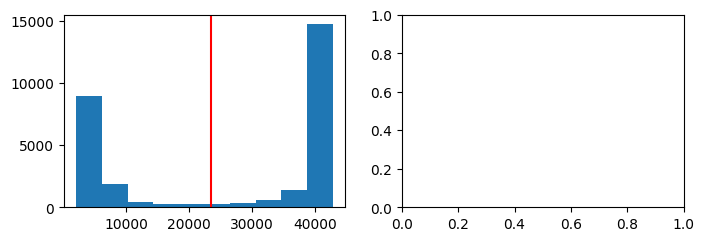

Promedio: [44540, 35787, 3928]
Dosis sin agua: [ 0.          0.5952819  10.46735804]
Dosis con agua: [3.34846118e-03 5.60062452e-01 1.03010243e+01]


In [7]:
import numpy as np
from calibration import polynomial_g3

mean_pixel, _ = inferir_img.get_stat(ch = "G", field_in_film = True, ar = 0.3, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)
#mean_pixel

optical_density = -np.log10(np.array(mean_pixel)/mean_pixel[0])

dosis_from_fit_sin = polynomial_g3(optical_density, *cal_sin.popt)
dosis_from_fit_sin[dosis_from_fit_sin < 0] = 0 # Remove doses < 0

dosis_from_fit_con = polynomial_g3(optical_density, *cal_agua.popt)
dosis_from_fit_con[dosis_from_fit_con < 0] = 0 # Remove doses < 0

print(f"Dosis sin agua: {dosis_from_fit_sin}")
print(f"Dosis con agua: {dosis_from_fit_con}")